In [2]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [4]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
patientsDf=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/cancer patient data sets.csv')
# download data from https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

In [ ]:
patientsDf.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Each row represents a patient

In [ ]:
patientsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

No missing data found
All attributes Are Numerical (Ordinal in logic) except Patient Id and Level (which can be considered Ordinal i.e. High, Medium and Low), Age is the only true Numerical Feature excluding the index feature

In [ ]:
patientsDf.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


You can see that the Categorical features have different scale.
For example:
Air Polution (1 min - 8 max) while
Genetic Risk (1 min - 7 max) while
Fatigue (1 min - 9 max) and so on.

In [ ]:
patientsDf["Level"].value_counts()

,count
Level,
High,365
Medium,332
Low,303


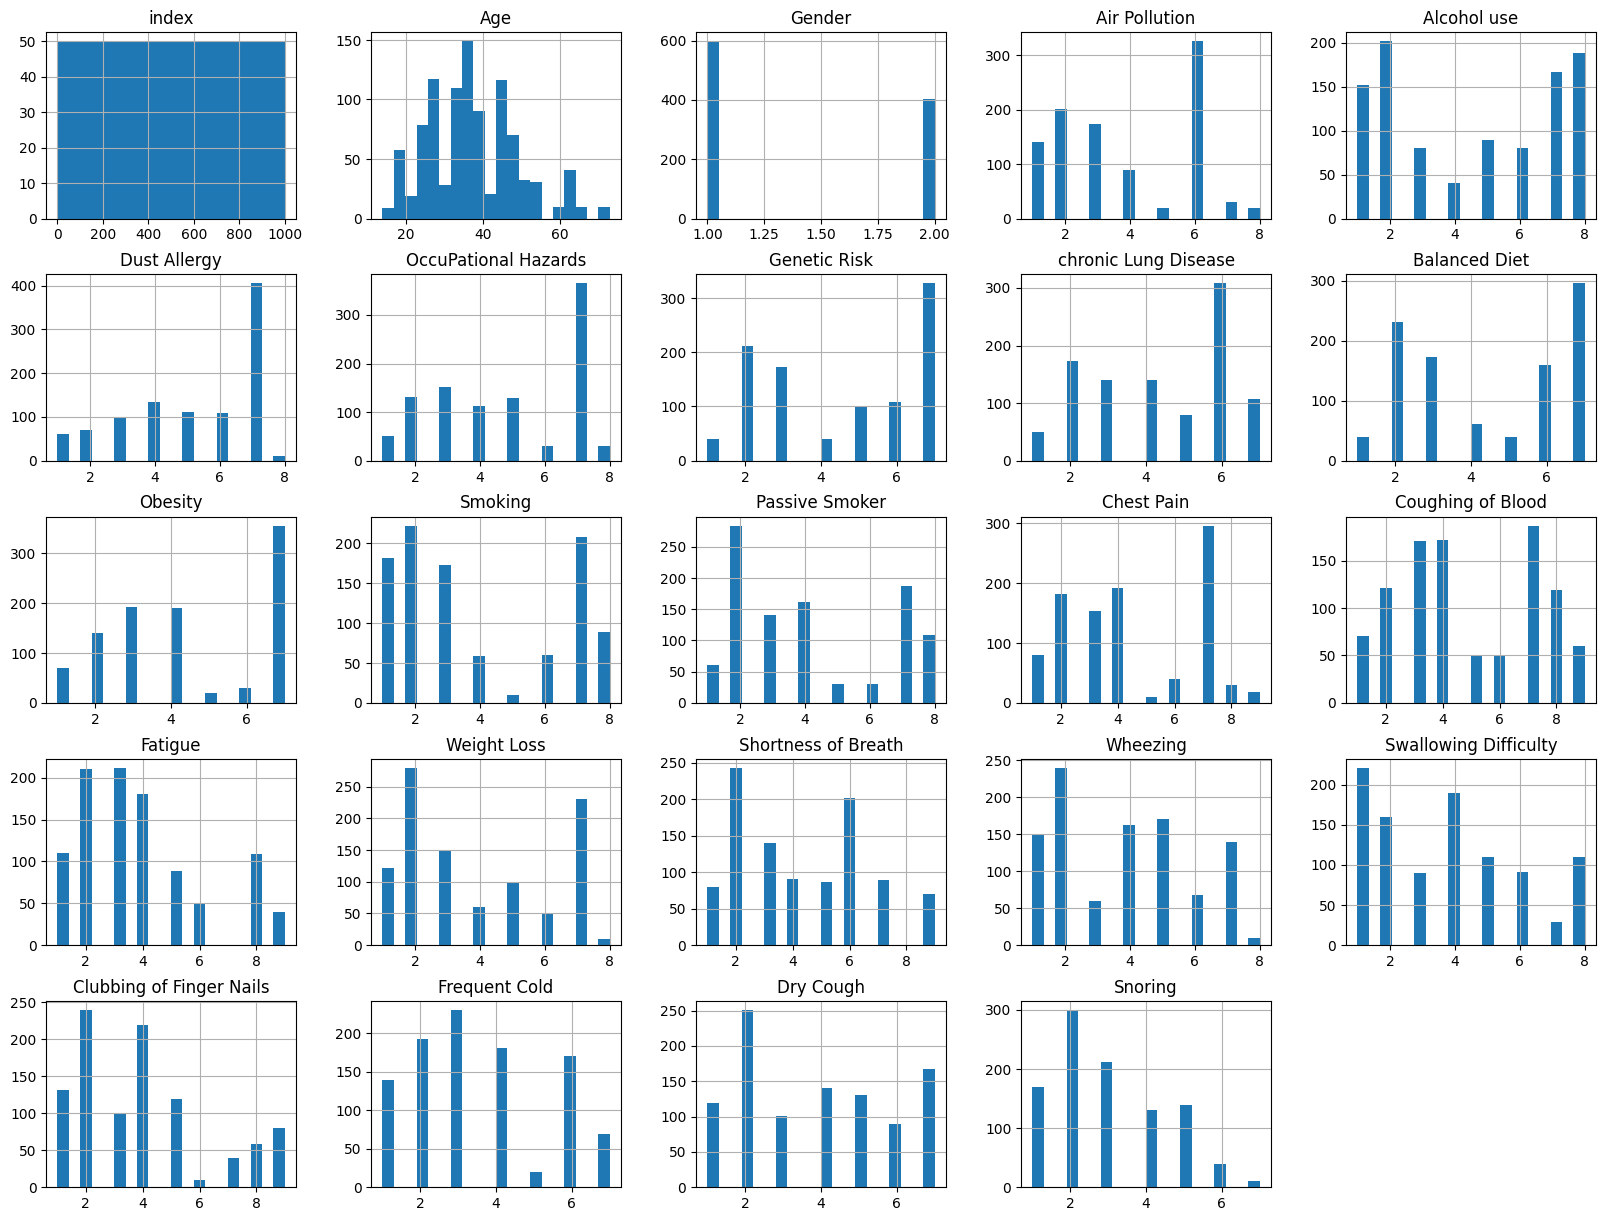

In [ ]:
patientsDf.hist(bins=20, figsize=(20,15))
plt.show()

In [12]:
# convert Level feature to numerical so that it can be correlated with others
patientsDf["Level"].replace({"Low":0,"Medium":1,"High":2}, inplace=True)

In [13]:
#attributes = ["Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy", "OccuPational Hazards"]
#corr_matrix = patientsDf.corr(attributes)

#extract all numerical features and check their correlation
numerical_features = patientsDf.select_dtypes(include=['number']).columns
corr_matrix = patientsDf[numerical_features].corr()
corr_matrix

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,1.000000,0.002674,-0.025739,0.053307,0.041374,0.037960,0.032355,0.030725,0.025177,0.030743,...,0.042346,0.026393,0.027950,0.015078,0.005573,0.015706,0.045687,0.003793,-0.002957,0.057758
Age,0.002674,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048
Gender,-0.025739,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985
Air Pollution,0.053307,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038
Alcohol use,0.041374,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.718710
Dust Allergy,0.037960,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839
OccuPational Hazards,0.032355,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.673255
Genetic Risk,0.030725,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303
chronic Lung Disease,0.025177,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971
Balanced Diet,0.030743,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.706273


In [ ]:
corr_matrix["Level"].sort_values(ascending=False)

,Level
Level,1.000000
Obesity,0.827435
Coughing of Blood,0.782092
Alcohol use,0.718710
Dust Allergy,0.713839
Balanced Diet,0.706273
Passive Smoker,0.703594
Genetic Risk,0.701303
OccuPational Hazards,0.673255
Chest Pain,0.645461


array([[<Axes: xlabel='Level', ylabel='Level'>,
        <Axes: xlabel='Obesity', ylabel='Level'>,
        <Axes: xlabel='Coughing of Blood', ylabel='Level'>,
        <Axes: xlabel='Alcohol use', ylabel='Level'>,
        <Axes: xlabel='Dust Allergy', ylabel='Level'>],
       [<Axes: xlabel='Level', ylabel='Obesity'>,
        <Axes: xlabel='Obesity', ylabel='Obesity'>,
        <Axes: xlabel='Coughing of Blood', ylabel='Obesity'>,
        <Axes: xlabel='Alcohol use', ylabel='Obesity'>,
        <Axes: xlabel='Dust Allergy', ylabel='Obesity'>],
       [<Axes: xlabel='Level', ylabel='Coughing of Blood'>,
        <Axes: xlabel='Obesity', ylabel='Coughing of Blood'>,
        <Axes: xlabel='Coughing of Blood', ylabel='Coughing of Blood'>,
        <Axes: xlabel='Alcohol use', ylabel='Coughing of Blood'>,
        <Axes: xlabel='Dust Allergy', ylabel='Coughing of Blood'>],
       [<Axes: xlabel='Level', ylabel='Alcohol use'>,
        <Axes: xlabel='Obesity', ylabel='Alcohol use'>,
        <Axes: x

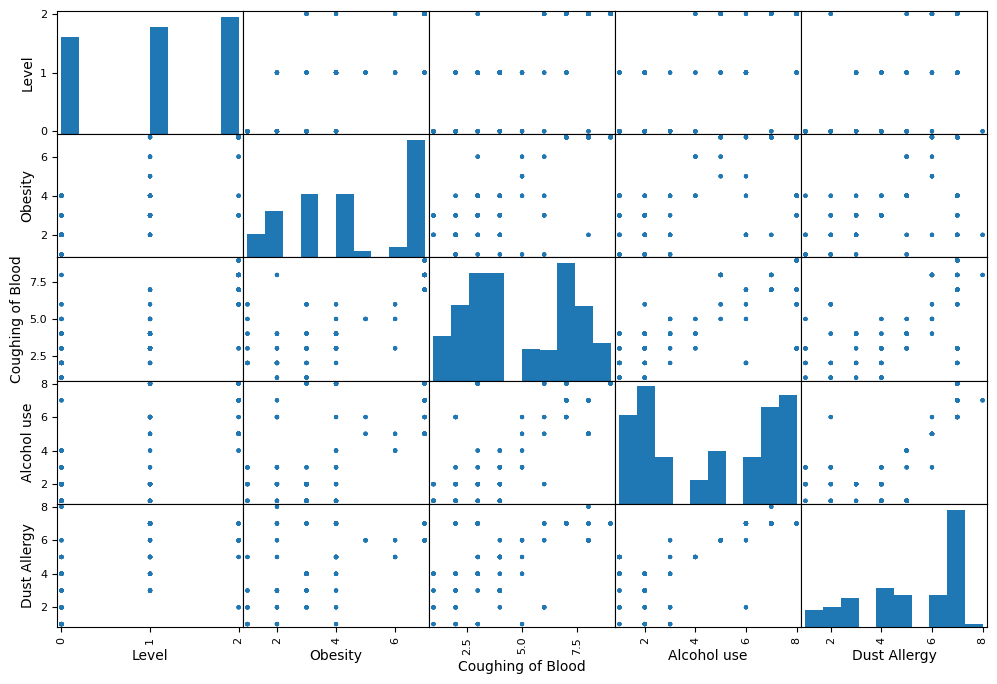

In [ ]:
from pandas.plotting import scatter_matrix

#get names of top 5 correlated features
top_5_correlated_features = corr_matrix["Level"].sort_values(ascending=False).head(5).index

#draw scatter matrix of top 5 features
scatter_matrix(patientsDf[top_5_correlated_features], figsize=(12,8))

(-1.0, 10.0, -1.0, 10.0)

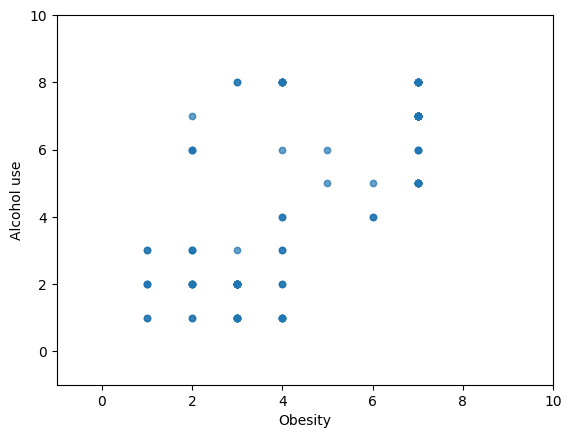

In [ ]:
#let's focus on a specific plot
patientsDf.plot(kind="scatter", x="Obesity", y="Alcohol use", alpha=0.1)
plt.axis([-1, 10, -1, 10])

In [15]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()

patientsDf_num = patientsDf.select_dtypes(include=['number'])

X = patientsDf_num.drop("Level", axis=1)
y = patientsDf_num["Level"]
y = y.values.reshape(-1,1)

X_scaled = minMaxScaler.fit_transform(X)
y_scaled = minMaxScaler.fit_transform(y)

#create single dataframe from X_scaled and y_scaled
patientsDf_scaled = pd.DataFrame(X_scaled, columns=X.columns)
patientsDf_scaled["Level"] = y_scaled

corr_matrix_scaled = patientsDf_scaled.corr()
corr_matrix_scaled["Level"].sort_values(ascending=False)

,Level
Level,1.000000
Obesity,0.827435
Coughing of Blood,0.782092
Alcohol use,0.718710
Dust Allergy,0.713839
Balanced Diet,0.706273
Passive Smoker,0.703594
Genetic Risk,0.701303
OccuPational Hazards,0.673255
Chest Pain,0.645461


note that the correlation values are the same even after scaling

In [ ]:
patientsDf_scaled.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.500000,0.392780,0.402000,0.405714,0.509000,0.595000,0.548571,0.596667,0.563333,0.581833,...,0.357000,0.407857,0.405000,0.396714,0.392286,0.365375,0.422667,0.475500,0.321000,0.531000
std,0.289109,0.203483,0.490547,0.290057,0.374354,0.282976,0.301115,0.354500,0.308086,0.355921,...,0.280577,0.315221,0.285636,0.291703,0.324340,0.298506,0.305417,0.339834,0.245781,0.407683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.233051,0.000000,0.142857,0.142857,0.428571,0.285714,0.166667,0.333333,0.166667,...,0.125000,0.142857,0.125000,0.142857,0.142857,0.125000,0.166667,0.166667,0.166667,0.000000
50%,0.500000,0.372881,0.000000,0.285714,0.571429,0.714286,0.571429,0.666667,0.500000,0.500000,...,0.250000,0.285714,0.375000,0.428571,0.428571,0.375000,0.333333,0.500000,0.333333,0.500000
75%,0.750000,0.525424,1.000000,0.714286,0.857143,0.857143,0.857143,1.000000,0.833333,1.000000,...,0.500000,0.714286,0.625000,0.571429,0.571429,0.500000,0.666667,0.833333,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: xlabel='Level', ylabel='Level'>,
        <Axes: xlabel='Obesity', ylabel='Level'>,
        <Axes: xlabel='Coughing of Blood', ylabel='Level'>,
        <Axes: xlabel='Alcohol use', ylabel='Level'>,
        <Axes: xlabel='Dust Allergy', ylabel='Level'>],
       [<Axes: xlabel='Level', ylabel='Obesity'>,
        <Axes: xlabel='Obesity', ylabel='Obesity'>,
        <Axes: xlabel='Coughing of Blood', ylabel='Obesity'>,
        <Axes: xlabel='Alcohol use', ylabel='Obesity'>,
        <Axes: xlabel='Dust Allergy', ylabel='Obesity'>],
       [<Axes: xlabel='Level', ylabel='Coughing of Blood'>,
        <Axes: xlabel='Obesity', ylabel='Coughing of Blood'>,
        <Axes: xlabel='Coughing of Blood', ylabel='Coughing of Blood'>,
        <Axes: xlabel='Alcohol use', ylabel='Coughing of Blood'>,
        <Axes: xlabel='Dust Allergy', ylabel='Coughing of Blood'>],
       [<Axes: xlabel='Level', ylabel='Alcohol use'>,
        <Axes: xlabel='Obesity', ylabel='Alcohol use'>,
        <Axes: x

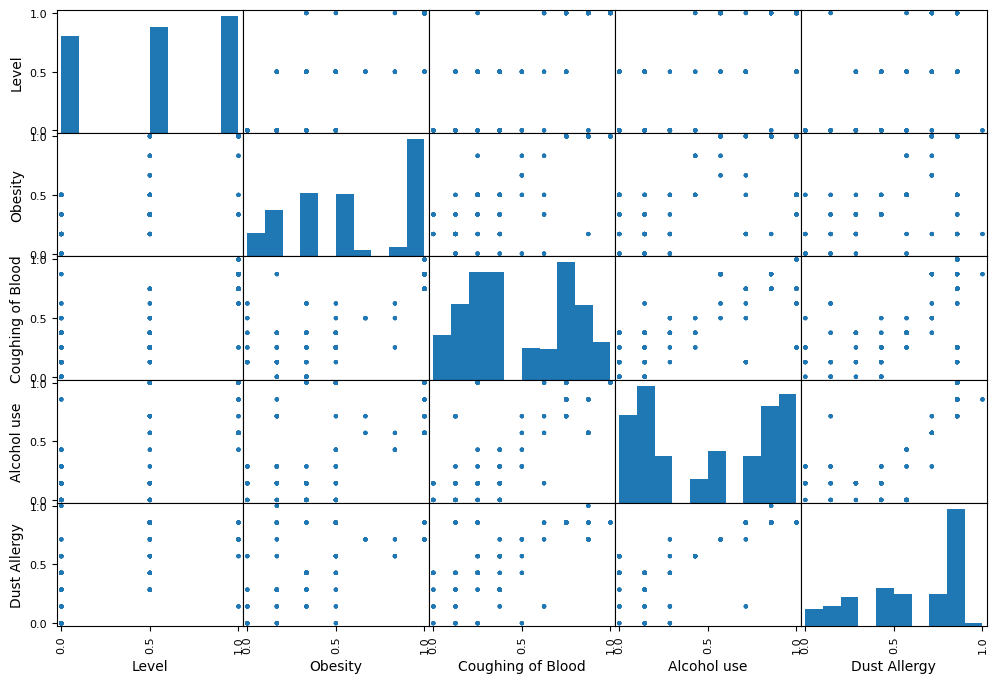

In [ ]:
from pandas.plotting import scatter_matrix

#get names of top 5 correlated features
top_5_correlated_features_scaled = corr_matrix_scaled["Level"].sort_values(ascending=False).head(5).index

#draw scatter matrix of top 5 features
scatter_matrix(patientsDf_scaled[top_5_correlated_features_scaled], figsize=(12,8))

Also note that the scatter of the scaled dataframe is the same as non-Scaled

In [23]:
#create new dataset where patientsDf_scaled["Level"] convert 0 to 1 and all others to 1
patientsDf_scaled_low = patientsDf_scaled.copy()
patientsDf_scaled_low["Level"] = patientsDf_scaled_low["Level"].apply(lambda x: 1 if x == 0 else 0)

patientsDf_scaled_medium = patientsDf_scaled.copy()
patientsDf_scaled_medium["Level"] = patientsDf_scaled_medium["Level"].apply(lambda x: 1 if x == .5 else 0)

patientsDf_scaled_high = patientsDf_scaled.copy()
patientsDf_scaled_high["Level"] = patientsDf_scaled_high["Level"].apply(lambda x: 1 if x == 1 else 0)

corr_matrix_low_Class = patientsDf_scaled_low.corr()
corr_matrix_low_Class["Level"].sort_values(ascending=False)



,Level
Level,1.000000
Gender,0.142881
index,-0.053425
Age,-0.096786
Smoking,-0.244449
Swallowing Difficulty,-0.286752
Dry Cough,-0.303725
Snoring,-0.350741
Wheezing,-0.388558
Clubbing of Finger Nails,-0.401744


In [20]:
corr_matrix_medium_Class = patientsDf_scaled_medium.corr()
corr_matrix_medium_Class["Level"].sort_values(ascending=False)

,Level
Level,1.000000
Wheezing,0.338184
Clubbing of Finger Nails,0.299423
Snoring,0.183782
Weight Loss,0.179220
Swallowing Difficulty,0.128505
Shortness of Breath,0.121163
Dust Allergy,0.098909
Age,0.084983
Frequent Cold,0.053386


In [24]:
corr_matrix_high_Class = patientsDf_scaled_high.corr()
corr_matrix_high_Class["Level"].sort_values(ascending=False)

,Level
Level,1.000000
Coughing of Blood,0.805834
Obesity,0.791475
Passive Smoker,0.765752
Balanced Diet,0.755926
Air Pollution,0.692319
Alcohol use,0.656258
Chest Pain,0.649947
Smoking,0.646111
Genetic Risk,0.640261


Note how each class has different correlataion values with different columns!